In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# use this: https://medium.com/@siladityaghosh/efficient-processing-of-large-csv-files-in-python-a-data-engineering-approach-3eabe3623416

In [ ]:
speed_data  = "/content/drive/MyDrive/masters-project/speed_data.csv"

In [ ]:
subsequences = "/content/drive/MyDrive/masters-project/subsequences.txt"
design = "/content/drive/MyDrive/masters-project/dr(eye)ve_design.txt"


In [ ]:
data = pd.read_csv(speed_data)

# Data Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555000 entries, 0 to 554999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   file_number  555000 non-null  int64  
 1   frame_num    555000 non-null  int64  
 2   speed        555000 non-null  int64  
 3   course       551969 non-null  float64
 4   lat          555000 non-null  float64
 5   lon          555000 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 25.4 MB


In [ ]:
data

,file_number,frame_num,speed,course,lat,lon
0,1,1,34,348.0,0.0,0.0
1,1,2,35,347.0,0.0,0.0
2,1,3,35,347.0,0.0,0.0
3,1,4,35,346.0,0.0,0.0
4,1,5,35,346.0,0.0,0.0
...,...,...,...,...,...,...
554995,74,7496,0,302.0,0.0,0.0
554996,74,7497,0,302.0,0.0,0.0
554997,74,7498,0,302.0,0.0,0.0
554998,74,7499,0,302.0,0.0,0.0


In [ ]:
data.describe()

,file_number,frame_num,speed,course,lat,lon
count,555000.000000,555000.000000,5.550000e+05,551969.000000,555000.000000,555000.000000
mean,37.500000,3750.500000,1.319207e+07,182.771897,1.774777,0.434506
std,21.360029,2165.065441,4.079355e+08,109.124776,8.723721,2.135773
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,19.000000,1875.750000,2.900000e+01,97.000000,0.000000,0.000000
50%,37.500000,3750.500000,4.800000e+01,194.000000,0.000000,0.000000
75%,56.000000,5625.250000,6.900000e+01,294.000000,0.000000,0.000000
max,74.000000,7500.000000,1.111111e+11,2895.000000,44.906450,11.008330


In [ ]:
data.isnull().sum()

,0
file_number,0
frame_num,0
speed,0
course,3031
lat,0
lon,0


In [ ]:

data = data.iloc[1: , :]
data = data.reset_index(drop=True)


In [ ]:
data

,file_number,frame_num,speed,course,lat,lon
0,1,2,35,347.0,0.0,0.0
1,1,3,35,347.0,0.0,0.0
2,1,4,35,346.0,0.0,0.0
3,1,5,35,346.0,0.0,0.0
4,1,6,35,346.0,0.0,0.0
...,...,...,...,...,...,...
554994,74,7496,0,302.0,0.0,0.0
554995,74,7497,0,302.0,0.0,0.0
554996,74,7498,0,302.0,0.0,0.0
554997,74,7499,0,302.0,0.0,0.0


In [ ]:
FRAME_RATE = 30
FRAME_DURATION = 1/FRAME_RATE


In [ ]:
data['timestamp'] = data['frame_num'] * FRAME_DURATION


In [ ]:
data

,file_number,frame_num,speed,course,lat,lon,timestamp
0,1,2,35,347.0,0.0,0.0,0.066667
1,1,3,35,347.0,0.0,0.0,0.100000
2,1,4,35,346.0,0.0,0.0,0.133333
3,1,5,35,346.0,0.0,0.0,0.166667
4,1,6,35,346.0,0.0,0.0,0.200000
...,...,...,...,...,...,...,...
554994,74,7496,0,302.0,0.0,0.0,249.866667
554995,74,7497,0,302.0,0.0,0.0,249.900000
554996,74,7498,0,302.0,0.0,0.0,249.933333
554997,74,7499,0,302.0,0.0,0.0,249.966667


# event distribution type

In [ ]:
def analyze_group(df):
    result = df.groupby(df['event_type'].ne(df['event_type'].shift()).cumsum())['event_type'].value_counts()
    return result


In [ ]:
design_data = pd.read_csv(design, sep="\t")
design_data = design_data.T.reset_index().T.reset_index(drop=True)
design_data.columns = ['file_number', 'time', 'weather', 'location', 'D', 'train/test']
design_data.at[0,'file_number'] = '1'
design_data['file_number'] = design_data['file_number'].astype(int)
design_data

design_data

,file_number,time,weather,location,D,train/test
0,1,Evening,Sunny,Countryside,D8,Training Set
1,2,Morning,Cloudy,Highway,D2,Training Set
2,3,Evening,Sunny,Highway,D3,Training Set
3,4,Night,Sunny,Downtown,D2,Training Set
4,5,Morning,Cloudy,Countryside,D7,Training Set
...,...,...,...,...,...,...
69,70,Morning,Rainy,Downtown,D3,Test Set
70,71,Night,Cloudy,Highway,D6,Test Set
71,72,Evening,Cloudy,Downtown,D2,Test Set
72,73,Night,Sunny,Countryside,D7,Test Set


In [ ]:
speed_design_data = pd.merge(data, design_data, on='file_number')
speed_design_data

,file_number,frame_num,speed,course,lat,lon,timestamp,time,weather,location,D,train/test
0,1,2,35,347.0,0.0,0.0,0.066667,Evening,Sunny,Countryside,D8,Training Set
1,1,3,35,347.0,0.0,0.0,0.100000,Evening,Sunny,Countryside,D8,Training Set
2,1,4,35,346.0,0.0,0.0,0.133333,Evening,Sunny,Countryside,D8,Training Set
3,1,5,35,346.0,0.0,0.0,0.166667,Evening,Sunny,Countryside,D8,Training Set
4,1,6,35,346.0,0.0,0.0,0.200000,Evening,Sunny,Countryside,D8,Training Set
...,...,...,...,...,...,...,...,...,...,...,...,...
554994,74,7496,0,302.0,0.0,0.0,249.866667,Morning,Rainy,Downtown,D4,Test Set
554995,74,7497,0,302.0,0.0,0.0,249.900000,Morning,Rainy,Downtown,D4,Test Set
554996,74,7498,0,302.0,0.0,0.0,249.933333,Morning,Rainy,Downtown,D4,Test Set
554997,74,7499,0,302.0,0.0,0.0,249.966667,Morning,Rainy,Downtown,D4,Test Set


# Speed Analysis

In [ ]:
def event_counter(df):
    """
    Analyzes consecutive occurrences of events within a DataFrame.

    This function calculates two things for each event type in the DataFrame:
    1. The length of consecutive sequences of each event type.
    2. The number of times each event type appears consecutively in these sequences.

    Args:
        df (pd.DataFrame): DataFrame containing at least a column named 'event_type'.

    Returns:
        pd.Series: A Series with the count of consecutive occurrences of each event type.
    """
    result = df.groupby(df['speed'].ne(df['speed'].shift()).cumsum())['speed'].value_counts() # This line had an indentation error
    return result

event_counts = data.groupby('file_number').apply(event_counter) # Also, '-' was used instead of '_' in the function name
event_counts


file_number  speed  speed
1            1      35         7
             2      36        19
             3      37        35
             4      38        12
             5      39        11
                            ... 
74           600    4          5
             601    3          5
             602    2         10
             603    1         10
             604    0        287
Name: count, Length: 36196, dtype: int64

In [ ]:

avg_event_counts = event_counts.groupby(level=0).mean()
print(avg_event_counts)


file_number
1     16.517621
2     14.367816
3     32.751092
4     17.241379
5     11.885895
        ...    
70    11.609907
71    13.089005
72    16.268980
73    12.214984
74    12.417219
Name: count, Length: 74, dtype: float64


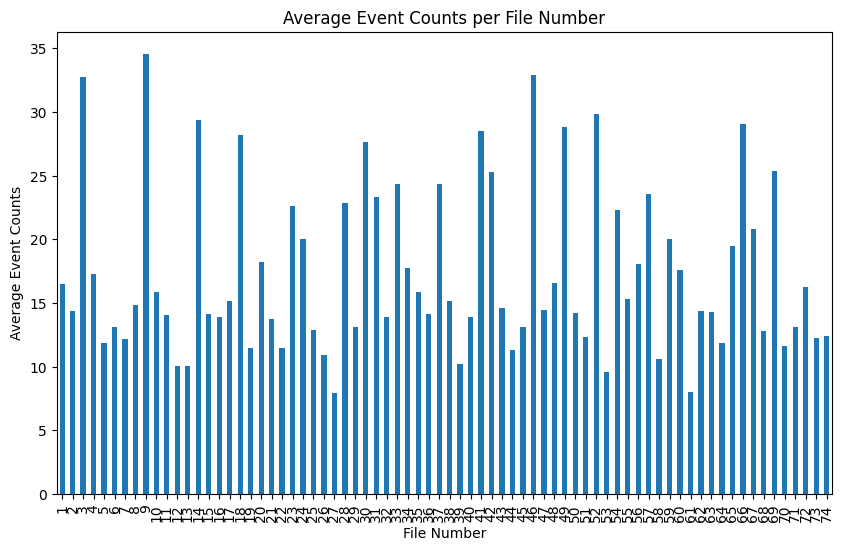

In [ ]:

# Plotting average event counts for each file number
plt.figure(figsize=(10, 6))
avg_event_counts.plot(kind='bar')
plt.title('Average Event Counts per File Number')
plt.xlabel('File Number')
plt.ylabel('Average Event Counts')
plt.show()


In [ ]:
overall_avg_event_counts = avg_event_counts.mean()
print(overall_avg_event_counts)


17.36315255774688


In [ ]:
merged_event_counts = pd.merge(avg_event_counts.reset_index(), design_data, left_on='file_number', right_on='file_number')
print(merged_event_counts)


    file_number      count     time weather     location   D    train/test
0             1  16.517621  Evening   Sunny  Countryside  D8  Training Set
1             2  14.367816  Morning  Cloudy      Highway  D2  Training Set
2             3  32.751092  Evening   Sunny      Highway  D3  Training Set
3             4  17.241379    Night   Sunny     Downtown  D2  Training Set
4             5  11.885895  Morning  Cloudy  Countryside  D7  Training Set
..          ...        ...      ...     ...          ...  ..           ...
69           70  11.609907  Morning   Rainy     Downtown  D3      Test Set
70           71  13.089005    Night  Cloudy      Highway  D6      Test Set
71           72  16.268980  Evening  Cloudy     Downtown  D2      Test Set
72           73  12.214984    Night   Sunny  Countryside  D7      Test Set
73           74  12.417219  Morning   Rainy     Downtown  D4      Test Set

[74 rows x 7 columns]


In [ ]:
least_20_event_counts = merged_event_counts.nsmallest(20, 'count')
print("Least 20 event counts:")
print(least_20_event_counts)

top_20_event_counts = merged_event_counts.nlargest(20, 'count')
print("\nTop 20 event counts:")
print(top_20_event_counts)


Least 20 event counts:
    file_number      count     time weather     location   D    train/test
26           27   7.961783  Evening   Rainy     Downtown  D6  Training Set
60           61   8.047210    Night   Sunny     Downtown  D5      Test Set
52           53   9.554140  Evening  Cloudy     Downtown  D7      Test Set
11           12  10.013351  Evening   Rainy     Downtown  D1  Training Set
12           13  10.026738    Night   Rainy     Downtown  D4  Training Set
38           39  10.245902    Night   Rainy     Downtown  D4      Test Set
57           58  10.593220    Night  Cloudy     Downtown  D4      Test Set
25           26  10.901163  Morning   Rainy     Downtown  D5  Training Set
43           44  11.329305  Morning   Rainy  Countryside  D1      Test Set
21           22  11.467890  Morning   Rainy  Countryside  D7  Training Set
18           19  11.503067    Night   Sunny     Downtown  D6  Training Set
69           70  11.609907  Morning   Rainy     Downtown  D3      Test Set
4 

# Course Analysis

## Deviation from Course Analysis

In [ ]:
def calculate_deviation_threshold_per_window(data, window_size=20, threshold_value=0.2):
    """
    Calculate deviation thresholds for each window based on a fixed threshold value from the mean course.
    Check how many times the driver deviates from each window's threshold.

    Parameters:
    - data: DataFrame containing the 'course' column.
    - window_size: Number of frames to average.
    - threshold_value: Fixed threshold value to use for setting the deviation threshold.

    Returns:
    - deviation_counts: Series with the number of deviations for each window.
    """
    # Calculate group index for averaging every `window_size` frames
    data['group_index'] = (data.index // window_size) + 1

    # Calculate mean for each window
    window_means = data.groupby('group_index')['course'].mean()

    # Merge the mean course values back into the original DataFrame
    data = data.merge(window_means.rename('mean_course'), on='group_index')

    # Calculate deviations from the window-specific mean
    data['deviation'] = (data['course'] - data['mean_course']).abs()

    # Count the number of deviations exceeding the threshold for each window
    deviation_counts = data.groupby('group_index')['deviation'].apply(lambda x: (x > threshold_value).sum())

    return deviation_counts, data



In [ ]:
deviation_counts, deviation_count_data = calculate_deviation_threshold_per_window(speed_design_data, window_size=30, threshold_value=5)

print("Deviation Counts per Window:")
print(deviation_counts)


Deviation Counts per Window:
group_index
1        0
2        0
3        0
4        0
5        0
        ..
18496    0
18497    0
18498    0
18499    0
18500    0
Name: deviation, Length: 18500, dtype: int64


In [ ]:
deviation_count_data.deviation.describe()

,deviation
count,551968.000000
mean,2.185947
std,14.916691
min,0.000000
25%,0.100000
50%,0.433333
75%,1.000000
max,2520.333333


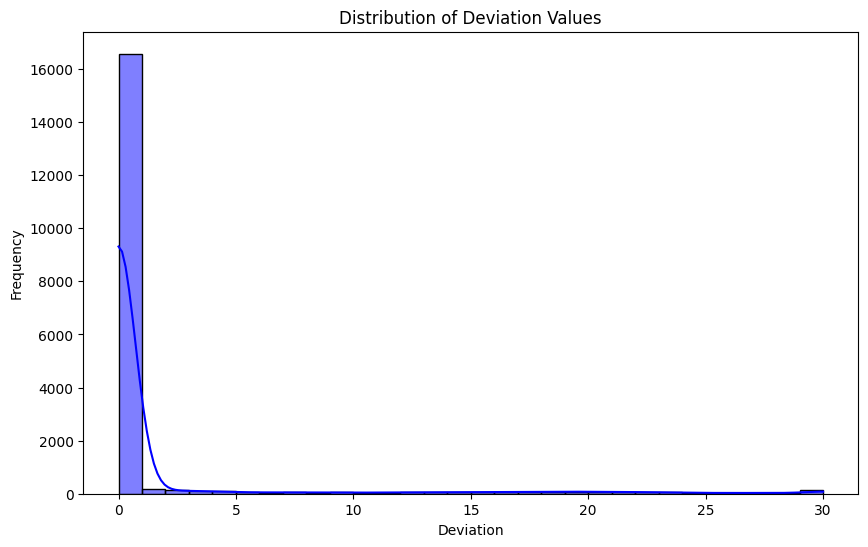

In [ ]:
def plot_deviation_distribution(data):
    """
    Plot the distribution of deviation values.

    Parameters:
    - data: DataFrame containing the 'deviation' column.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data.values, bins=30, kde=True, color='blue')
    plt.title('Distribution of Deviation Values')
    plt.xlabel('Deviation')
    plt.ylabel('Frequency')
    plt.show()


!pip install seaborn

plot_deviation_distribution(deviation_counts)


In [ ]:
deviation_count_data

,file_number,frame_num,speed,course,lat,lon,timestamp,time,weather,location,D,train/test,group_index,mean_course,deviation
0,1,2,35,347.0,0.0,0.0,0.066667,Evening,Sunny,Countryside,D8,Training Set,1,342.333333,4.666667
1,1,3,35,347.0,0.0,0.0,0.100000,Evening,Sunny,Countryside,D8,Training Set,1,342.333333,4.666667
2,1,4,35,346.0,0.0,0.0,0.133333,Evening,Sunny,Countryside,D8,Training Set,1,342.333333,3.666667
3,1,5,35,346.0,0.0,0.0,0.166667,Evening,Sunny,Countryside,D8,Training Set,1,342.333333,3.666667
4,1,6,35,346.0,0.0,0.0,0.200000,Evening,Sunny,Countryside,D8,Training Set,1,342.333333,3.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554994,74,7496,0,302.0,0.0,0.0,249.866667,Morning,Rainy,Downtown,D4,Test Set,18500,302.000000,0.000000
554995,74,7497,0,302.0,0.0,0.0,249.900000,Morning,Rainy,Downtown,D4,Test Set,18500,302.000000,0.000000
554996,74,7498,0,302.0,0.0,0.0,249.933333,Morning,Rainy,Downtown,D4,Test Set,18500,302.000000,0.000000
554997,74,7499,0,302.0,0.0,0.0,249.966667,Morning,Rainy,Downtown,D4,Test Set,18500,302.000000,0.000000


In [ ]:
deviation_count_data.deviation.describe()

,deviation
count,551968.000000
mean,2.185947
std,14.916691
min,0.000000
25%,0.100000
50%,0.433333
75%,1.000000
max,2520.333333


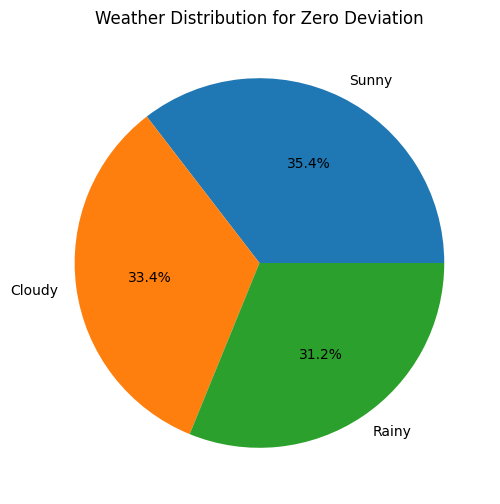

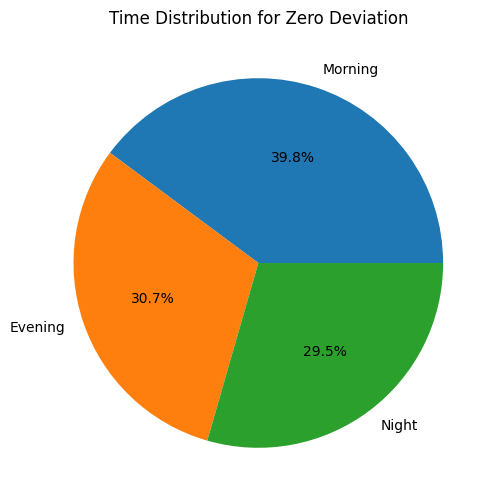

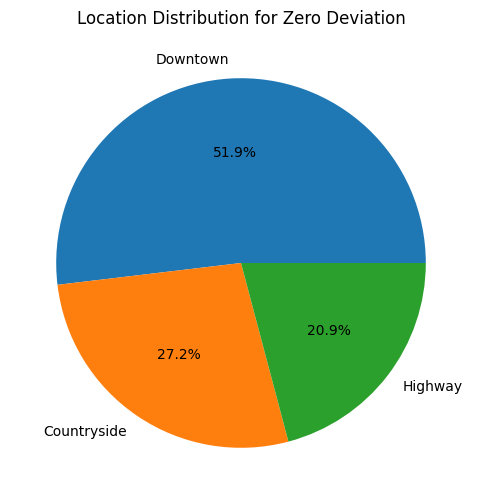

In [ ]:
zero_deviation = deviation_count_data[deviation_count_data['deviation'] == 0]

plt.figure(figsize=(6, 6))
zero_deviation['weather'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Weather Distribution for Zero Deviation')
plt.ylabel('')
plt.show()

plt.figure(figsize=(6, 6))
zero_deviation['time'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Time Distribution for Zero Deviation')
plt.ylabel('')
plt.show()

plt.figure(figsize=(6, 6))
zero_deviation['location'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Location Distribution for Zero Deviation')
plt.ylabel('')
plt.show()


In [ ]:
# Group by 'file_number' and calculate statistics for 'mean_course'
mean_course_stats = deviation_count_data.groupby('file_number')['mean_course'].agg(['mean', 'std', 'min', 'max'])

# Group by 'file_number' and calculate statistics for 'deviation'
deviation_stats = deviation_count_data.groupby('file_number')['deviation'].agg(['mean', 'std', 'min', 'max'])

# Print the results
print(mean_course_stats)
print(deviation_stats)


                   mean         std         min         max
file_number                                                
1            265.262817  112.423706   13.433333  353.700000
2            116.355285  132.145577    2.187500  358.433333
3            250.256013  118.945315    2.600000  359.366667
4            235.788382   29.422408  184.666667  287.200000
5            138.880632   99.328260    1.000000  356.433333
...                 ...         ...         ...         ...
70           242.747603   87.988316   14.100000  347.366667
71           194.763036   39.511768   24.733333  241.433333
72            84.722963   40.761867   19.633333  275.033333
73           171.782036   58.408306   92.100000  297.000000
74           237.852693  114.781792   20.517241  332.166667

[74 rows x 4 columns]
                 mean        std  min         max
file_number                                      
1            2.435031  16.927529  0.0  321.250000
2            4.343128  23.821431  0.0  333.1666

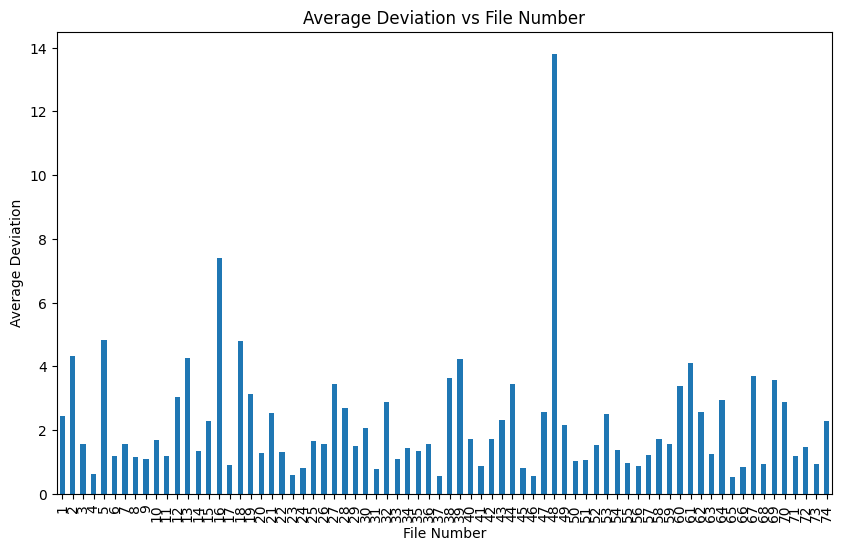

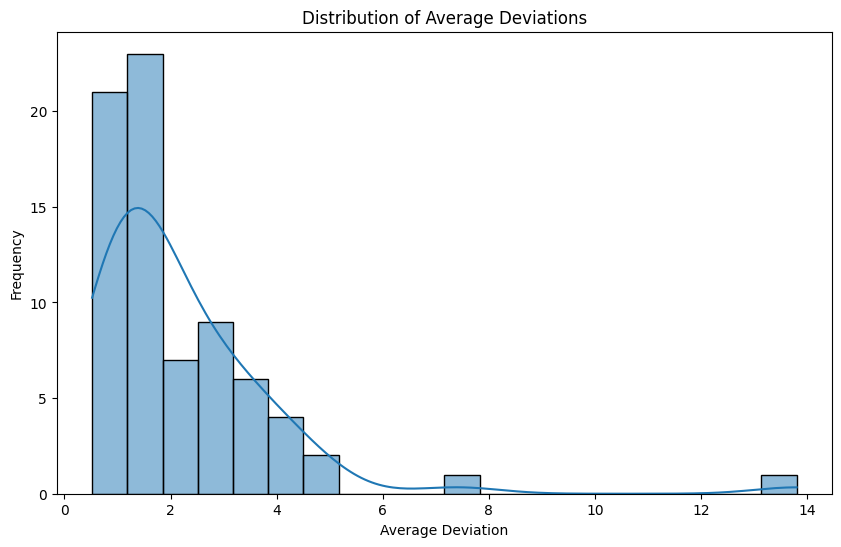

In [ ]:

# Graph the average deviation vs file_number
plt.figure(figsize=(10, 6))
deviation_stats['mean'].plot(kind='bar')
plt.title('Average Deviation vs File Number')
plt.xlabel('File Number')
plt.ylabel('Average Deviation')
plt.show()

# Distribution plot of deviation_stats
plt.figure(figsize=(10, 6))
sns.histplot(deviation_stats['mean'], bins=20, kde=True)
plt.title('Distribution of Average Deviations')
plt.xlabel('Average Deviation')
plt.ylabel('Frequency')
plt.show()


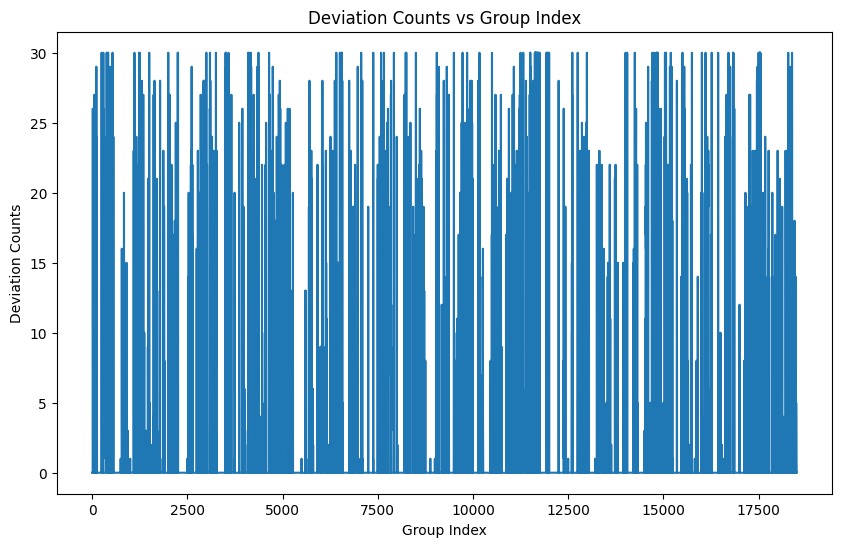

In [ ]:
# Plotting deviation counts vs group index
plt.figure(figsize=(10, 6))
plt.plot(deviation_counts.index, deviation_counts.values)
plt.xlabel('Group Index')
plt.ylabel('Deviation Counts')
plt.title('Deviation Counts vs Group Index')
plt.show()



## Staying on Course Analysis

In [ ]:
def course_counter(df):
    """
    Analyzes consecutive occurrences of events within a DataFrame.

    This function calculates two things for each event type in the DataFrame:
    1. The length of consecutive sequences of each event type.
    2. The number of times each event type appears consecutively in these sequences.

    Args:
        df (pd.DataFrame): DataFrame containing at least a column named 'event_type'.

    Returns:
        pd.Series: A Series with the count of consecutive occurrences of each event type.
    """
    result = df.groupby(df['course'].ne(df['course'].shift()).cumsum())['course'].value_counts() # This line had an indentation error
    return result

course_counts = data.groupby('file_number').apply(course_counter) # Also, '-' was used instead of '_' in the function name
course_counts


file_number  course  course
1            1       347.0       2
             2       346.0       3
             3       345.0       3
             4       344.0       2
             5       343.0       4
                              ... 
74           1232    306.0       2
             1233    305.0       2
             1234    304.0       2
             1235    303.0       2
             1236    302.0     359
Name: count, Length: 68454, dtype: int64

In [ ]:
avg_course_counts = course_counts.groupby(level=0).mean()
print(avg_course_counts)


file_number
1      9.771540
2      8.210410
3     12.113636
4     12.274959
5      6.973154
        ...    
70     5.383896
71     6.537925
72     8.123510
73     8.875740
74     6.096827
Name: count, Length: 74, dtype: float64


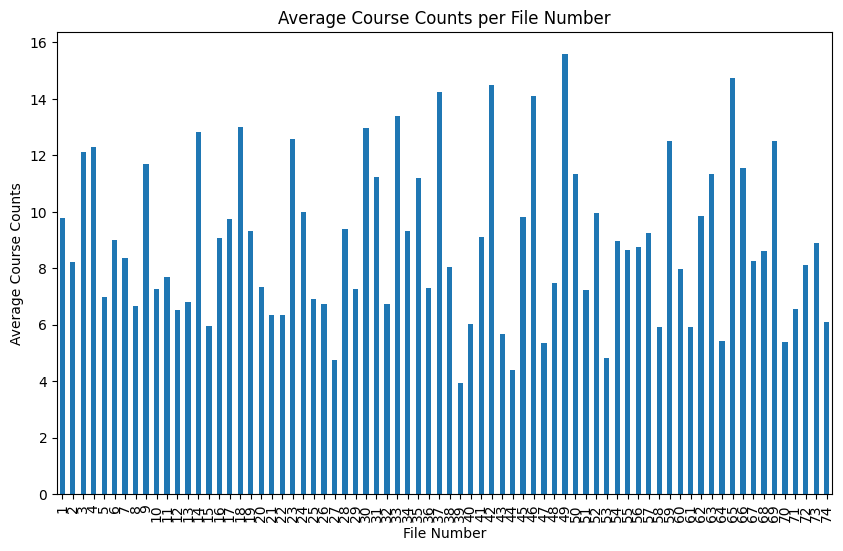

In [ ]:
# Plotting average course counts for each file number
plt.figure(figsize=(10, 6))
avg_course_counts.plot(kind='bar')
plt.title('Average Course Counts per File Number')
plt.xlabel('File Number')
plt.ylabel('Average Course Counts')
plt.show()


In [ ]:
speed_design_data

,file_number,frame_num,speed,course,lat,lon,timestamp,time,weather,location,D,train/test,group_index
0,1,2,35,347.0,0.0,0.0,0.066667,Evening,Sunny,Countryside,D8,Training Set,1
1,1,3,35,347.0,0.0,0.0,0.100000,Evening,Sunny,Countryside,D8,Training Set,1
2,1,4,35,346.0,0.0,0.0,0.133333,Evening,Sunny,Countryside,D8,Training Set,1
3,1,5,35,346.0,0.0,0.0,0.166667,Evening,Sunny,Countryside,D8,Training Set,1
4,1,6,35,346.0,0.0,0.0,0.200000,Evening,Sunny,Countryside,D8,Training Set,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
554994,74,7496,0,302.0,0.0,0.0,249.866667,Morning,Rainy,Downtown,D4,Test Set,18500
554995,74,7497,0,302.0,0.0,0.0,249.900000,Morning,Rainy,Downtown,D4,Test Set,18500
554996,74,7498,0,302.0,0.0,0.0,249.933333,Morning,Rainy,Downtown,D4,Test Set,18500
554997,74,7499,0,302.0,0.0,0.0,249.966667,Morning,Rainy,Downtown,D4,Test Set,18500


In [ ]:
merged_avg_course_counts = pd.merge(avg_course_counts.reset_index(), design_data, left_on='file_number', right_on='file_number')

# Get the rows with the top 20 average course counts
top_20_course_counts_merged = merged_avg_course_counts.nlargest(15, 'count')

print("Top 20 average course counts merged:")
print(top_20_course_counts_merged)


Top 20 average course counts merged:
    file_number      count     time weather     location   D    train/test
48           49  15.585774  Morning  Cloudy      Highway  D3      Test Set
64           65  14.730845  Morning   Sunny     Downtown  D2      Test Set
41           42  14.491262  Evening  Cloudy      Highway  D1      Test Set
36           37  14.231499  Morning   Rainy      Highway  D8  Training Set
45           46  14.097744  Evening   Rainy  Countryside  D5      Test Set
32           33  13.404332  Evening  Cloudy      Highway  D4  Training Set
17           18  13.010811    Night   Sunny     Downtown  D1  Training Set
29           30  12.973868  Evening  Cloudy      Highway  D7  Training Set
13           14  12.831904  Morning   Rainy      Highway  D6  Training Set
22           23  12.582215  Morning   Sunny  Countryside  D5  Training Set
68           69  12.512648  Evening   Rainy      Highway  D2      Test Set
58           59  12.493266  Morning  Cloudy      Highway  D7   

In [ ]:

# Get the rows with the least 20 average course counts
least_20_course_counts_merged = merged_avg_course_counts.nsmallest(15, 'count')

print("\nLeast 20 average course counts merged:")
print(least_20_course_counts_merged)



Least 20 average course counts merged:
    file_number     count     time weather     location   D    train/test
38           39  3.928376    Night   Rainy     Downtown  D4      Test Set
43           44  4.392836  Morning   Rainy  Countryside  D1      Test Set
26           27  4.728339  Evening   Rainy     Downtown  D6  Training Set
52           53  4.800000  Evening  Cloudy     Downtown  D7      Test Set
46           47  5.347609  Morning   Rainy     Downtown  D7      Test Set
69           70  5.383896  Morning   Rainy     Downtown  D3      Test Set
63           64  5.413295  Evening  Cloudy     Downtown  D8      Test Set
42           43  5.670704    Night  Cloudy  Countryside  D2      Test Set
57           58  5.904649    Night  Cloudy     Downtown  D4      Test Set
60           61  5.909234    Night   Sunny     Downtown  D5      Test Set
14           15  5.938889  Evening   Sunny  Countryside  D5  Training Set
39           40  6.036232  Morning   Sunny     Downtown  D1      Test Se

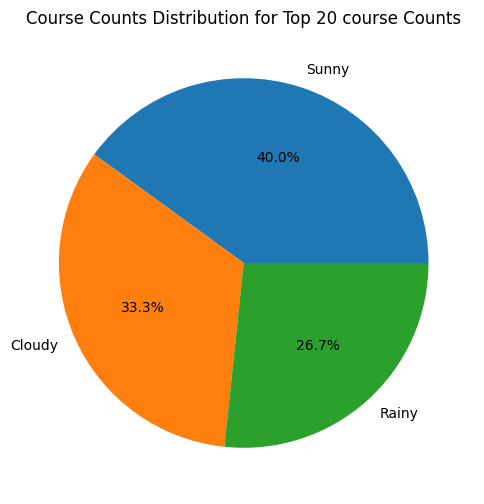

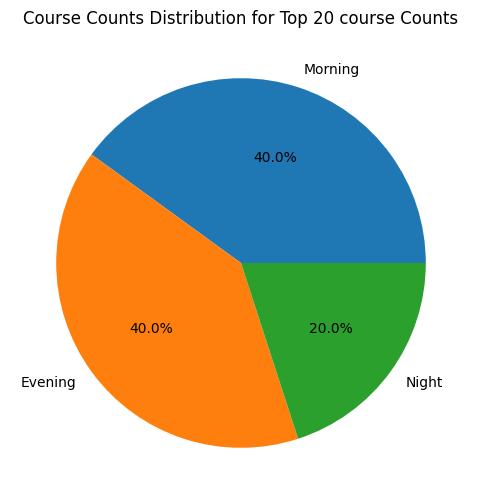

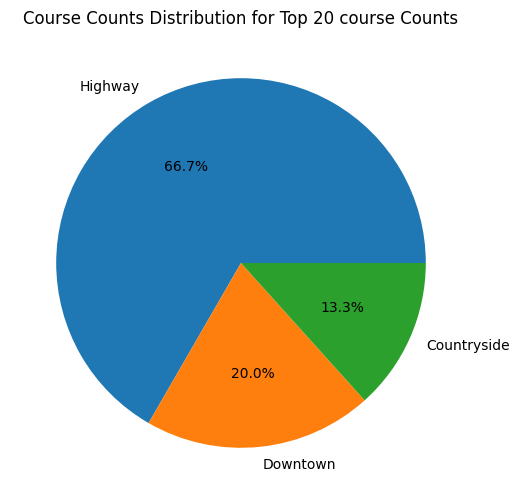

In [ ]:
# Top 20 course counts
plt.figure(figsize=(6, 6))
top_20_course_counts_merged['weather'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Course Counts Distribution for Top 20 course Counts')
plt.ylabel('')
plt.show()

plt.figure(figsize=(6, 6))
top_20_course_counts_merged['time'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Course Counts Distribution for Top 20 course Counts')
plt.ylabel('')
plt.show()

plt.figure(figsize=(6, 6))
top_20_course_counts_merged['location'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Course Counts Distribution for Top 20 course Counts')
plt.ylabel('')
plt.show()



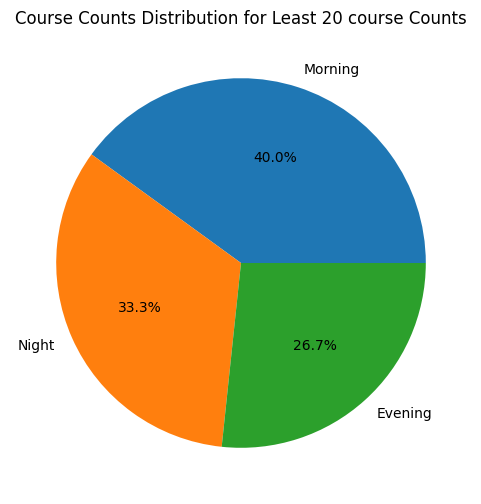

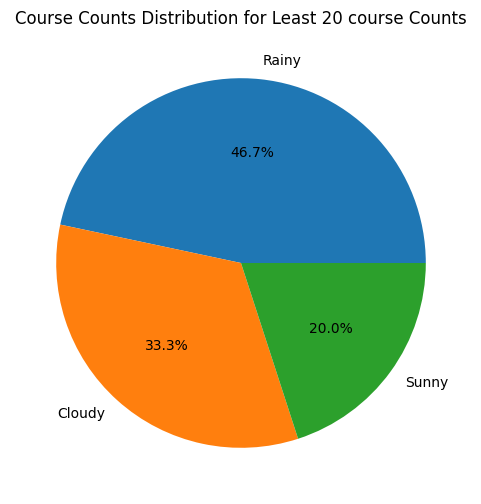

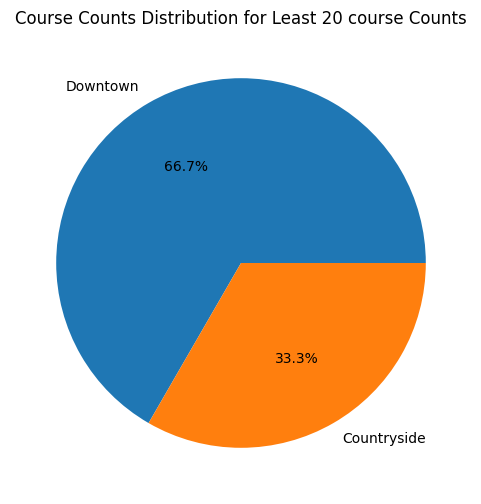

In [ ]:
# least 20 Course Counts
plt.figure(figsize=(6, 6))
least_20_course_counts_merged['time'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Course Counts Distribution for Least 20 course Counts')
plt.ylabel('')
plt.show()

plt.figure(figsize=(6, 6))
least_20_course_counts_merged['weather'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Course Counts Distribution for Least 20 course Counts')
plt.ylabel('')
plt.show()

plt.figure(figsize=(6, 6))
least_20_course_counts_merged['location'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Course Counts Distribution for Least 20 course Counts')
plt.ylabel('')
plt.show()

In [ ]:

def calculate_course_change(df):
  df['course_change'] = df['course'].diff() / df['timestamp'].diff()
  return df

data = data.groupby('file_number').apply(calculate_course_change).reset_index(drop=True)

data


,file_number,frame_num,speed,course,lat,lon,timestamp,course_change
0,1,2,35,347.0,0.0,0.0,0.066667,NaN
1,1,3,35,347.0,0.0,0.0,0.100000,0.0
2,1,4,35,346.0,0.0,0.0,0.133333,-30.0
3,1,5,35,346.0,0.0,0.0,0.166667,0.0
4,1,6,35,346.0,0.0,0.0,0.200000,0.0
...,...,...,...,...,...,...,...,...
554994,74,7496,0,302.0,0.0,0.0,249.866667,0.0
554995,74,7497,0,302.0,0.0,0.0,249.900000,0.0
554996,74,7498,0,302.0,0.0,0.0,249.933333,0.0
554997,74,7499,0,302.0,0.0,0.0,249.966667,0.0
